# Project-6 Data Pre-processing, Results, and Correlation Analysis

In [1]:
import pandas as pd
import json 
import os

In [2]:
with open('../data/structured_data_full.json', 'r') as f:
    data_full = json.load(f)

with open('../data/structured_data.json', 'r') as f:
    data = json.load(f)

with open("../data/new_morality_check_gpt4omini_structured.json", "r") as f:
    morality_check = json.load(f)

In [3]:
len(morality_check["Superbad"]["SETH"])

296

In [4]:
len(data["Superbad"]["characters"]["SETH"]["sentences"])

296

In [38]:
len(morality_check)

# Let's do the loop on morality_check

97

In [45]:
data["Superbad"]["characters"]["SETH"]["sentences"]

['Yo.',
 "I was doing research last night, for next year, and I think I'm gon na go with Bang Bus.",
 "The one where they bang the chicks on the bus. Thirteen bucks a month. Total access, live Web Cam feed. The works. It'll be like I'm on the bus, banging them myself.",
 'It shows up under a different name.',
 "I hope. Bang Bus. That would n't look good. Maybe I should just pick the one with the least dirty sounding name.",
 "I could tell my parents I'm doing a project on Rome and I have to research orgies.",
 "Do n't touch that!",
 "Yeah, you know. I got some other places. Good places. I think we'll be fine.",
 "That's disgusting.",
 'I am truly, truly jealous that you got to suck on those tits when you were a baby.',
 "Fuck it. I'm a senior about to graduate. They should be suckin' my balls. It's the least they can do for stealing three years of my life.",
 "Oh, yeah dude, I forgot to tell you. I knocked the fuckin' shit out of him in capture the flag last week.",
 "They're like baby

In [75]:
# Construct the data for project-6

data_for_project_6 = {}
sentences_data = {}

for movie, movie_data in morality_check.items():
    sentences_data[movie] = {}
    for character, char_data in movie_data.items():
        sentences = data[movie]["characters"][character]["sentences"]
        sentences_data[movie][character] = sentences

labels_data =  {}

for movie, movie_data in morality_check.items():
    labels_data[movie] = {}
    for character, char_data in movie_data.items():
        labels_data[movie][character] = [1 if label == 'yes' else 0 for label in char_data]

In [76]:
# Now we store the sentences and labels in the data_for_project_6 dictionary
data_for_project_6["sentences"] = sentences_data
data_for_project_6["ground_truths"] = labels_data

In [77]:
# Before we're saving, we want to make sure the number of sentences and labels match

for movie, movie_data in data_for_project_6["sentences"].items():
    for character, sentences in movie_data.items():
        labels = data_for_project_6["ground_truths"][movie][character]
        if len(sentences) != len(labels):
            print(f"Warning: Mismatch in {movie} - {character}: {len(sentences)} sentences vs {len(labels)} labels")

In [81]:
# Let's save the data to a JSON file
output_file_path = '../data/project_6_data.json'
with open(output_file_path, 'w') as f:
    json.dump(data_for_project_6, f, indent=4)

In [55]:
len(data_for_project_6["sentences"])

97

In [56]:
len(data_for_project_6["ground_truths"])

97

In [80]:
# Let's check the size of each class

def count_classes(labels_data):
    class_counts = {"moral": 0, "non_moral": 0}
    for movie, characters in labels_data.items():
        for character, labels in characters.items():
            class_counts["moral"] += labels.count(1)
            class_counts["non_moral"] += labels.count(0)
    return class_counts

count_classes(data_for_project_6["ground_truths"])

# The ratio is 1:4

{'moral': 9179, 'non_moral': 34983}

In [10]:
moral_ratings = {}

for movie, movie_data in data.items():
    moral_ratings[movie] = {}
    for character, char_data in movie_data["characters"].items():
        if "rating" in char_data:
            moral_ratings[movie][character] = char_data["rating"]
        else:
            moral_ratings[movie][character] = None

## Performance Analysis

In [3]:
# Load the performance results

performance_results = pd.read_csv('../data/project_6_performance.csv', header=None)

In [ ]:
def log_metrics_to_csv(log_path, model_name, epoch, train_losses, train_metrics, eval_metrics):
    row = [
        model_name, epoch,
        train_losses["total"], train_losses["recon"], train_losses["cls"], train_losses["kl"],
        train_metrics["accuracy"], train_metrics["f1_score"], train_metrics["roc_auc"],
        eval_metrics["accuracy"], eval_metrics["precision"], eval_metrics["recall"],
        eval_metrics["f1_score"], eval_metrics["roc_auc"]]

In [88]:
# Rename the columns of performance_results
performance_results.columns = [
    "model_name", "epoch",
    "train_loss_total", "train_loss_recon", "train_loss_cls", "train_loss_kl",
    "train_accuracy", "train_f1_score", "train_roc_auc",
    "eval_accuracy", "eval_precision", "eval_recall",
    "eval_f1_score", "eval_roc_auc"
]

In [89]:
# Here is the performance of the model on project-6

performance_results

,model_name,epoch,train_loss_total,train_loss_recon,train_loss_cls,train_loss_kl,train_accuracy,train_f1_score,train_roc_auc,eval_accuracy,eval_precision,eval_recall,eval_f1_score,eval_roc_auc
0,bert-base-uncased,1,1890.240670,29.311243,1860.929427,0,0.739671,0.521979,0.816961,0.741568,0.477684,0.772077,0.590207,0.833978
1,bert-base-uncased,2,1666.167129,13.920131,1652.246999,0,0.732584,0.530827,0.833065,0.727852,0.464057,0.833022,0.596062,0.849106
2,bert-base-uncased,3,1592.655382,12.737577,1579.917804,0,0.748032,0.544327,0.841979,0.743592,0.481441,0.826803,0.608536,0.856641
3,bert-base-uncased,4,1563.642606,12.437053,1551.205554,0,0.797969,0.572731,0.848900,0.788188,0.543256,0.761505,0.634127,0.862240
4,roberta-base,1,2179.217702,82.982555,2096.235147,0,0.548614,0.380085,0.655191,0.548568,0.313389,0.732898,0.439043,0.665225
5,roberta-base,2,2065.016084,16.375371,2048.640712,0,0.571769,0.381684,0.658210,0.547519,0.313451,0.736940,0.439826,0.664904
6,roberta-base,3,2030.524107,10.969648,2019.554460,0,0.668866,0.400166,0.680655,0.633413,0.353610,0.629042,0.452725,0.686408
7,roberta-base,4,2009.368851,8.292356,2001.076495,0,0.790457,0.269082,0.686177,0.755284,0.484081,0.231654,0.313354,0.691505
8,microsoft/deberta-v3-base,1,2309.119375,199.427529,2109.691846,0,0.200105,0.327069,0.720771,0.246215,0.242180,0.999067,0.389856,0.742228
9,microsoft/deberta-v3-base,2,2078.989846,56.656602,2022.333246,0,0.689082,0.438679,0.732614,0.698396,0.418152,0.641791,0.506379,0.749548


In [26]:
import torch
import torch.nn as nn
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader
from transformers import get_scheduler
import torch.nn.functional as F

class MoralClassifier(nn.Module):
    def __init__(self, base_model, latent_dim=768, inject_operation = "summation"):
        super().__init__()
        self.bert = base_model
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, 1)  # Binary classification (moral or not)
        self.operation = inject_operation

    def forward(self, input_ids, attention_mask, char_vec=None):
        """
        A forward function. This can be extended to support more operations.
        """

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token

        if char_vec is not None:
            if self.operation == "summation":
                cls_embedding = cls_embedding + char_vec  # Inject character info

        cls_embedding = self.dropout(cls_embedding)
        logits = self.classifier(cls_embedding)
        return logits


/Users/owner/miniconda3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel

# Load base model architecture (e.g., roberta-base)
model_name = "bert-base-uncased"
base_model = AutoModel.from_pretrained(model_name)

# Reconstruct full classifier model
classifier = MoralClassifier(base_model)

# Load state_dict from file
classifier.load_state_dict(torch.load("..//data/moral-classification/summer-report-5/trainable-base/bert/classifier_2.pt", map_location="cpu"))

# Move to eval mode and device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.to(device)
classifier.eval()
bert_model = classifier.bert

project_6_data = json.load(open('../data/project_6_data.json', 'r'))
# Load all tokenizers and models once
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


# Embedding function
def generate_embeddings(tokenizer, model, sentences, batch_size=1):
    all_embeddings = []

    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token
            all_embeddings.append(cls_embeddings.cpu())

        del inputs, outputs, cls_embeddings
        torch.cuda.empty_cache()

    return torch.cat(all_embeddings, dim=0).numpy()

bert_embeddings = {}

for movie, characters in tqdm(project_6_data["sentences"].items(), desc="Processing movies"):
    bert_embeddings[movie] = {}

    for character, sentences in tqdm(characters.items(), desc=f"Processing characters in {movie}", leave=False):
        bert_embeddings[movie][character] = generate_embeddings(bert_tokenizer, bert_model, sentences)


/var/folders/4p/8nlm0n094791rk0xf6jzk8ch0000gn/T/ipykernel_15231/1339396971.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier.load_state_dict(torch.load("..//d

In [31]:
import pickle
import os

output_dir = "../data/moral-classification/summer-report-5/trainable-base/bert"
with open(os.path.join(output_dir, "bert_embeddings.pkl"), "wb") as f:
    pickle.dump(bert_embeddings, f)

# Correlation Analysis

Now we're observing the correlation between the latent character embeddings with the crowd-sourced ratings. We do this in 2 ways, Spearman's correlation and Ridge Regression. 

In [80]:
count = 0
for movie in bert_embeddings:
    for char in bert_embeddings[movie]:
        if bert_embeddings[movie][char] is not None:
            count += 1

In [5]:
import pickle
import os
import numpy

# Set directory
embedding_dir = "../data/structured_embeddings"

# Load each embedding dictionary
with open(os.path.join(embedding_dir, "bert_embeddings.pkl"), "rb") as f:
    bert_embeddings = pickle.load(f)

with open(os.path.join(embedding_dir, "roberta_embeddings.pkl"), "rb") as f:
    roberta_embeddings = pickle.load(f)

with open(os.path.join(embedding_dir, "deberta_embeddings.pkl"), "rb") as f:
    deberta_embeddings = pickle.load(f)

with open(os.path.join(embedding_dir, "electra_embeddings.pkl"), "rb") as f:
    electra_embeddings = pickle.load(f)

print("All embeddings loaded.")

All embeddings loaded.


In [44]:
import torch
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def method_1(embeddings_data, ratings_data):
    latent_list, rating_list = [], []
    

    for movie in embeddings_data:
        for character in embeddings_data[movie]:
            latent = embeddings_data[movie][character]
            rating = ratings_data[movie][character]

            if latent is not None and rating is not None:
                latent_list.append(torch.tensor(latent))
                rating_list.append(torch.tensor(rating))

    latent_matrix = torch.stack(latent_list).numpy()
    rating_matrix = torch.stack(rating_list).numpy()

    num_latent = latent_matrix.shape[1]
    num_traits = rating_matrix.shape[1]
    correlation_matrix = np.zeros((num_latent, num_traits))

    for i in range(num_latent):
        for j in range(num_traits):
            x, y = latent_matrix[:, i], rating_matrix[:, j]
            correlation_matrix[i, j] = np.nan if np.std(x) == 0 or np.std(y) == 0 else spearmanr(x, y)[0]

    return pd.DataFrame(
        correlation_matrix,
        index=[f"latent_{i}" for i in range(num_latent)],
        columns=[f"trait_{j}" for j in range(num_traits)]
    )


def method_2(embeddings_data, ratings_data):
    latent_list, rating_list = [], []

    for movie in embeddings_data:
        for character in embeddings_data[movie]:
            latent = embeddings_data[movie][character]
            rating = ratings_data[movie][character]

            if latent is not None and rating is not None:
                latent_list.append(torch.tensor(latent))
                rating_list.append(torch.tensor(rating))

    X = torch.stack(latent_list).numpy()
    Y = torch.stack(rating_list).numpy()

    n_traits = Y.shape[1]
    latent_dim = X.shape[1]
    rows = []

    for j in range(n_traits):
        y = Y[:, j]
        if np.std(y) == 0:
            row = {"trait_index": f"trait_{j}", "r2_score": np.nan}
            row.update({f"latent_{k}": np.nan for k in range(latent_dim)})
        else:
            model = LinearRegression().fit(X, y)
            r2 = r2_score(y, model.predict(X))
            row = {"trait_index": f"trait_{j}", "r2_score": r2}
            row.update({f"latent_{k}": coef for k, coef in enumerate(model.coef_)})
        rows.append(row)

    return pd.DataFrame(rows)


In [7]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim=768, latent_dim=20, dropout=0.0):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        recon = self.decoder(z)
        return recon, z


Trait Set
- 14: cunning – honorable
- 25: forgiving – vengeful
- 28: loyal – traitorous
- 31: rude – respectful
- 38: arrogant – humble
- 39: heroic – villainous
- 79: selfish – altruistic
- 81: angelic – demonic
- 84: cruel – kind
- 101: biased – impartial
- 121: sarcastic – genuine
- 154: judgemental – accepting
- 195: complimentary – insulting
- 222: wholesome – salacious
- 227: racist – egalitarian
- 396: innocent – jaded
- 434: resentful – euphoric
- 448: fake – real
- 450: catty – supportive
- 489: sincere – irreverent
- 494: hopeful – fearful


In [50]:
trait_dict = {
    14: "cunning-honorable",
    25: "forgiving-vengeful",
    28: "loyal-traitorous",
    31: "rude-respectful",
    38: "arrogant-humble",
    39: "heroic-villainous",
    79: "selfish-altruistic",
    81: "angelic-demonic",
    84: "cruel-kind",
    101: "biased-impartial",
    121: "sarcastic-genuine",
    154: "judgemental-accepting",
    195: "complimentary-insulting",
    222: "wholesome-salacious",
    227: "racist-egalitarian",
    396: "innocent-jaded",
    434: "resentful-euphoric",
    448: "fake-real",
    450: "catty-supportive",
    489: "sincere-irreverent",
    494: "hopeful-fearful"
}

In [14]:
trait_set = [14, 25, 28, 31, 38, 39, 79, 81, 84, 101, 121, 154, 195, 222, 227, 396, 434, 448, 450, 489, 494]

### BERT

In [8]:
# Load the model_H
model_H = Autoencoder(input_dim=768, latent_dim=20, dropout=0.1)
model_H.load_state_dict(torch.load("../data/moral-classification/summer-report-5/frozen-base/bert/model_H_1.pt", map_location=torch.device('cpu')))

avg_embedding_bert = {}

for movie_name, characters in bert_embeddings.items():
    avg_embedding_bert[movie_name] = {}
    for char_name, sentence_embeddings in characters.items():
        # Convert to tensor if not already
        tensor_embeddings = torch.tensor(sentence_embeddings)  # shape: [num_sentences, embedding_dim]
        mean_embedding = tensor_embeddings.mean(dim=0)  # shape: [embedding_dim]
        avg_embedding_bert[movie_name][char_name] = mean_embedding.tolist()

latent_embeddings_bert = {}

model_H.eval()  # Set model to evaluation mode

latent_embeddings_bert = {}

for movie_name, characters in avg_embedding_bert.items():
    latent_embeddings_bert[movie_name] = {}
    for char_name, avg_emb in characters.items():
        with torch.no_grad():
            input_tensor = torch.tensor(avg_emb).float().unsqueeze(0)  # shape: [1, 768]
            latent_vector = model_H.encoder(input_tensor)  # shape: [1, 20]
            latent_embeddings_bert[movie_name][char_name] = latent_vector.squeeze(0).tolist()  # shape: [20]

/var/folders/4p/8nlm0n094791rk0xf6jzk8ch0000gn/T/ipykernel_15231/1993433038.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_H.load_state_dict(torch.load("../data/m

In [11]:
result_bert_1 = method_1(latent_embeddings_bert, moral_ratings)

In [12]:
result_bert_2 = method_2(latent_embeddings_bert, moral_ratings)

In [15]:
# Convert trait indices to column/row names
trait_cols = [f"trait_{i}" for i in trait_set]

# Filter result_bert_1 columns
filtered_result_bert_1 = result_bert_1[trait_cols]

# Filter result_bert_2 rows (since traits are in the 'trait_index' column)
filtered_result_bert_2 = result_bert_2[result_bert_2["trait_index"].isin(trait_cols)]

In [16]:
filtered_result_bert_1

output_path = '../data/moral-classification/filtered_result_bert_1.csv'
filtered_result_bert_1.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

Filtered result saved to ../data/moral-classification/filtered_result_bert_1.csv


In [17]:
filtered_result_bert_2

output_path = '../data/moral-classification/filtered_result_bert_2.csv'
filtered_result_bert_2.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

Filtered result saved to ../data/moral-classification/filtered_result_bert_2.csv


In [18]:
def get_strong_correlations(corr_df, threshold=0.4):
    """
    Returns a list of (latent, trait, correlation) tuples where
    |correlation| > threshold from the method_1 result.

    Parameters:
        corr_df (pd.DataFrame): Output from method_1
        threshold (float): Threshold for absolute correlation

    Returns:
        List[Tuple[str, str, float]]
    """
    strong_pairs = []

    for latent in corr_df.index:
        for trait in corr_df.columns:
            corr = corr_df.at[latent, trait]
            if pd.notna(corr) and abs(corr) > threshold:
                strong_pairs.append((latent, trait, corr))

    return strong_pairs

get_strong_correlations(filtered_result_bert_1, threshold=0.3)

[('latent_2', 'trait_81', np.float64(-0.35949086126449603)),
 ('latent_4', 'trait_81', np.float64(0.3789768384483171)),
 ('latent_6', 'trait_81', np.float64(0.4342080423203572)),
 ('latent_6', 'trait_84', np.float64(-0.37298809429846086)),
 ('latent_7', 'trait_81', np.float64(-0.38731741597186375)),
 ('latent_7', 'trait_84', np.float64(0.380447191183222)),
 ('latent_8', 'trait_84', np.float64(-0.3138354979431927)),
 ('latent_12', 'trait_31', np.float64(0.31589793535854244)),
 ('latent_12', 'trait_396', np.float64(-0.3150736096955118)),
 ('latent_12', 'trait_434', np.float64(0.3672345815536071)),
 ('latent_13', 'trait_81', np.float64(0.3436387395254661)),
 ('latent_13', 'trait_84', np.float64(-0.3122986062621325)),
 ('latent_13', 'trait_434', np.float64(-0.3179539698561034)),
 ('latent_14', 'trait_81', np.float64(-0.32104499576970685)),
 ('latent_15', 'trait_25', np.float64(0.3163680213258291)),
 ('latent_15', 'trait_31', np.float64(0.3634131510074609)),
 ('latent_15', 'trait_81', np.fl

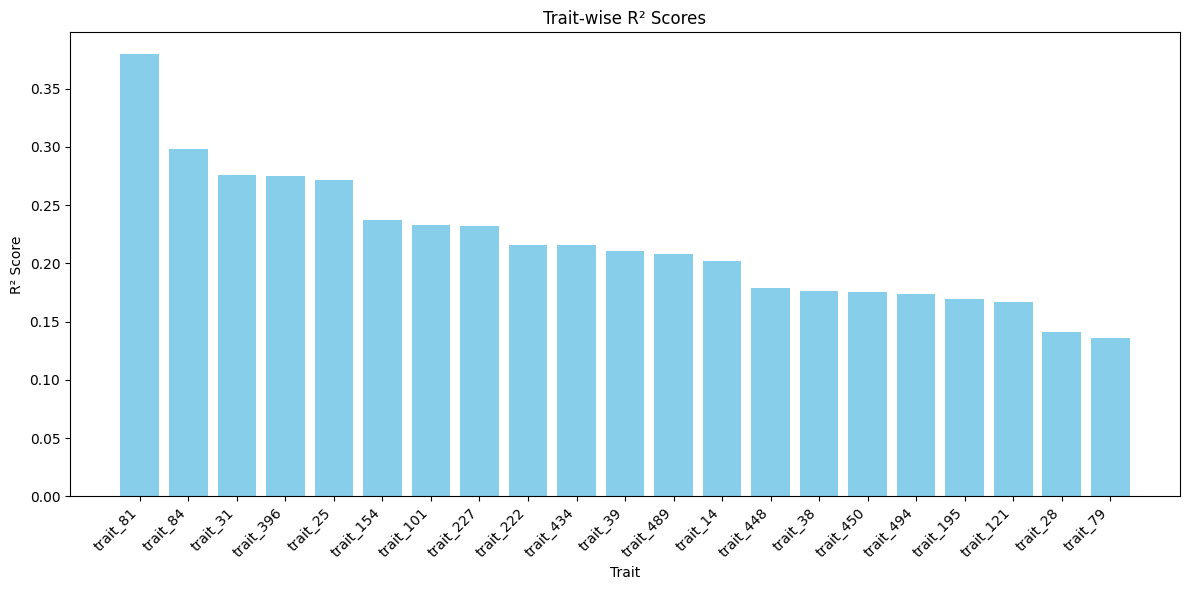

In [19]:
import matplotlib.pyplot as plt

def plot_r2_scores(result_df, top_n=None, figsize=(12, 6), title="Trait-wise R² Scores"):
    """
    Plots a bar chart of R² scores from the result of method_2.

    Parameters:
        result_df (pd.DataFrame): Output of method_2
        top_n (int, optional): Plot only the top N traits by R². If None, plot all.
        figsize (tuple): Figure size
        title (str): Title of the plot
    """
    # Drop NaN values and sort by R² score
    df = result_df.dropna(subset=["r2_score"]).sort_values("r2_score", ascending=False)

    if top_n:
        df = df.head(top_n)

    plt.figure(figsize=figsize)
    plt.bar(df["trait_index"], df["r2_score"], color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Trait")
    plt.ylabel("R² Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_r2_scores(filtered_result_bert_2)

### ROBERTA

In [31]:
# Load the model_H
model_H = Autoencoder(input_dim=768, latent_dim=20, dropout=0.1)
model_H.load_state_dict(torch.load("../data/moral-classification/model_H_roberta.pt", map_location=torch.device('cpu')))

avg_embedding_roberta = {}

for movie_name, characters in roberta_embeddings.items():
    avg_embedding_roberta[movie_name] = {}
    for char_name, sentence_embeddings in characters.items():
        # Convert to tensor if not already
        tensor_embeddings = torch.tensor(sentence_embeddings)  # shape: [num_sentences, embedding_dim]
        mean_embedding = tensor_embeddings.mean(dim=0)  # shape: [embedding_dim]
        avg_embedding_roberta[movie_name][char_name] = mean_embedding.tolist()

latent_embeddings_roberta = {}

model_H.eval()  # Set model to evaluation mode

latent_embeddings_roberta = {}

for movie_name, characters in avg_embedding_roberta.items():
    latent_embeddings_roberta[movie_name] = {}
    for char_name, avg_emb in characters.items():
        with torch.no_grad():
            input_tensor = torch.tensor(avg_emb).float().unsqueeze(0)  # shape: [1, 768]
            latent_vector = model_H.encoder(input_tensor)  # shape: [1, 20]
            latent_embeddings_roberta[movie_name][char_name] = latent_vector.squeeze(0).tolist()  # shape: [20]

/var/folders/4p/8nlm0n094791rk0xf6jzk8ch0000gn/T/ipykernel_531/1078072831.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_H.load_state_dict(torch.load("../data/mor

In [32]:
result_roberta_1 = method_1(latent_embeddings_roberta, moral_ratings)

In [33]:
result_roberta_1

,trait_0,trait_1,trait_2,trait_3,trait_4,trait_5,trait_6,trait_7,trait_8,trait_9,...,trait_490,trait_491,trait_492,trait_493,trait_494,trait_495,trait_496,trait_497,trait_498,trait_499
latent_0,0.063422,0.159801,0.056953,0.005950,-0.005439,0.013194,0.224894,-0.107303,0.073106,-0.008912,...,-0.010375,-0.022470,-0.151705,0.000616,-0.015042,-0.022229,-0.062223,-0.138448,-0.010951,0.038014
latent_1,0.012232,-0.058072,-0.000260,-0.137270,-0.090883,-0.033583,-0.200993,0.004385,-0.060762,0.106497,...,0.023374,0.095978,0.147331,0.002243,0.025742,-0.019831,0.022554,0.117658,-0.000661,-0.016742
latent_2,-0.022490,-0.085751,-0.029255,-0.090227,-0.073744,-0.017204,-0.191568,0.044750,-0.060367,0.054176,...,0.027938,0.071915,0.141063,-0.007207,0.028960,-0.013921,0.041194,0.122335,0.009011,-0.022478
latent_3,-0.108452,-0.173052,-0.095418,-0.009930,0.029244,-0.029332,-0.184323,0.163927,-0.029216,-0.029329,...,0.009279,0.008772,0.128346,-0.015983,0.013382,0.022678,0.067815,0.112986,0.018520,-0.008579
latent_4,0.213333,0.269078,0.191901,-0.015129,-0.196692,0.031319,0.130704,-0.317931,-0.086757,0.175803,...,0.006352,0.097765,-0.074370,0.044717,-0.011162,-0.076179,-0.072548,0.003932,-0.029125,-0.023072
latent_5,-0.135552,-0.208216,-0.129422,-0.013395,0.085528,-0.023685,-0.180916,0.205525,0.007138,-0.075491,...,0.007475,-0.017888,0.114181,-0.028419,0.017832,0.036234,0.073063,0.084078,0.020210,0.000417
latent_6,0.058601,0.145637,0.056684,0.032750,0.013418,0.005104,0.225075,-0.103245,0.069260,-0.010834,...,-0.030589,-0.042395,-0.149230,0.013579,-0.010613,-0.013213,-0.062650,-0.132907,-0.008980,0.032790
latent_7,0.123307,0.220284,0.111234,-0.015929,-0.082555,0.018762,0.191383,-0.194154,0.018218,0.070261,...,0.001671,0.022218,-0.134766,0.018078,-0.017122,-0.048254,-0.074826,-0.105153,-0.011839,0.013071
latent_8,-0.231934,-0.323248,-0.209672,0.071845,0.291973,-0.023367,-0.102304,0.347877,0.122975,-0.234016,...,-0.050231,-0.155960,0.042612,-0.027086,-0.012070,0.106757,0.104856,-0.042601,0.022017,0.015987
latent_9,-0.168230,-0.226951,-0.138114,0.006461,0.116772,-0.044570,-0.144051,0.254798,0.030320,-0.096669,...,-0.010460,-0.030385,0.099338,-0.023243,0.013059,0.043130,0.068842,0.062959,0.040497,0.003875


In [34]:
result_roberta_2 = method_2(latent_embeddings_roberta, moral_ratings)

In [35]:
result_roberta_2

,trait_index,r2_score,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16,latent_17,latent_18,latent_19
0,trait_0,0.299968,-2494.223633,2805.226074,1581.960449,501.145386,7716.886230,1418.561035,6149.920410,-891.804932,...,-4233.924316,1537.265503,266.908112,-5962.884277,7405.508301,-2273.053711,-7948.062500,-428.617401,-1765.541016,2072.097412
1,trait_1,0.318822,-2007.596436,767.984131,421.236969,439.958923,-4539.809570,-1615.485229,-4103.700195,5725.734375,...,1317.295776,1387.990845,3939.487305,717.040833,-4216.678711,-3033.536133,4435.763184,-1618.249146,1913.778442,-1488.804688
2,trait_2,0.215801,-2346.345947,1292.697754,-477.244904,-2133.693359,5972.447266,875.684265,1964.157715,-395.336365,...,-3720.950684,4442.347168,-313.564209,-3547.894775,3162.433838,-1726.125854,-3189.700684,1344.847290,790.079956,2415.763184
3,trait_3,0.328129,-379.207306,-4465.873535,-4934.894531,1915.502075,-940.831055,-5438.802734,-1077.421509,-4075.562744,...,2073.622559,-3754.627686,-5928.386719,1828.167358,-1485.802612,1721.809937,2823.831787,1119.707153,-1003.997559,1498.722534
4,trait_4,0.196290,-3.135979,-1412.523926,423.829529,-2851.977783,3386.824707,-847.375305,2061.330078,-4332.928711,...,-1492.334229,-2218.208496,-4563.076172,-1551.270020,-1435.495361,788.221008,-2928.860352,2359.873291,-867.564270,-1065.904663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,trait_495,0.188344,20.825453,2033.791260,-139.771805,4791.089355,4301.712891,3250.916260,3513.474365,-3810.224609,...,-2021.102539,-918.169373,57.519516,-631.275574,5162.889160,2220.500244,-5092.527344,1294.540527,-3109.892578,4496.486328
496,trait_496,0.114331,3369.285889,334.638367,2513.802734,-339.526794,-2431.746338,-6487.918945,-4325.368652,-3046.516846,...,132.040665,-1741.623901,513.992188,3595.648438,-3746.107422,1610.301880,2632.603516,-1705.859009,-219.213394,-2240.432129
497,trait_497,0.231314,-180.554047,1798.508789,-1334.168701,3715.662109,4011.781494,-1395.771240,3150.435547,-2623.382324,...,2256.639160,-906.621033,-151.660538,-1393.085449,3971.899414,2498.556885,-4783.412109,-3143.494629,-1648.616577,1378.881104
498,trait_498,0.186939,-906.134216,-1212.775513,-2796.542236,-4363.079590,-1870.460205,1241.931641,-3332.416504,4765.087402,...,1536.526978,3200.069092,-3332.387207,1621.895508,-5469.643555,128.513336,4683.339355,98.857674,3033.848633,-956.926514


In [57]:
# Convert trait indices to column/row names
trait_cols = [f"trait_{i}" for i in trait_set]

# Filter result_bert_1 columns
filtered_result_roberta_1 = result_roberta_1[trait_cols]

# Filter result_bert_2 rows (since traits are in the 'trait_index' column)
filtered_result_roberta_2 = result_roberta_2[result_roberta_2["trait_index"].isin(trait_cols)]

In [58]:
output_path = '../data/moral-classification/filtered_result_roberta_1.csv'
filtered_result_roberta_1.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

Filtered result saved to ../data/moral-classification/filtered_result_roberta_1.csv


In [59]:
output_path = '../data/moral-classification/filtered_result_roberta_2.csv'
filtered_result_roberta_2.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

Filtered result saved to ../data/moral-classification/filtered_result_roberta_2.csv


In [64]:
get_strong_correlations(filtered_result_roberta_1, threshold=0.3)

[('latent_8', 'trait_81', np.float64(-0.3467073449874867)),
 ('latent_10', 'trait_81', np.float64(0.38727655071522826))]

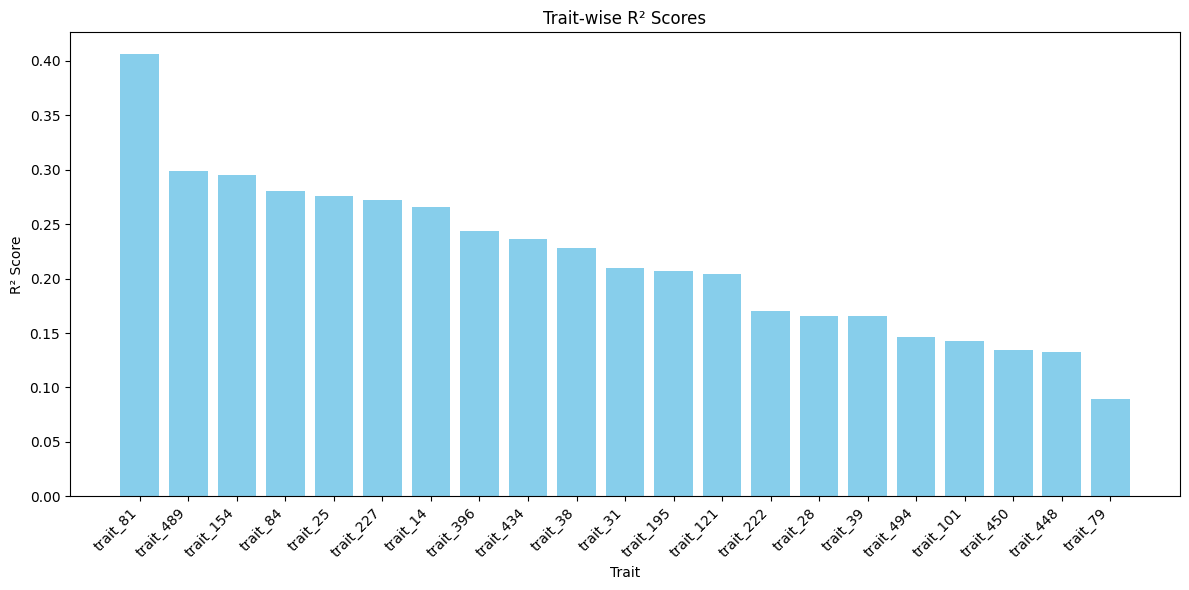

In [73]:

plot_r2_scores(filtered_result_roberta_2)

### DEBERTA

In [36]:
# Load the model_H
model_H = Autoencoder(input_dim=768, latent_dim=20, dropout=0.1)
model_H.load_state_dict(torch.load("../data/moral-classification/model_H_deberta.pt", map_location=torch.device('cpu')))

avg_embedding_deberta = {}

for movie_name, characters in deberta_embeddings.items():
    avg_embedding_deberta[movie_name] = {}
    for char_name, sentence_embeddings in characters.items():
        # Convert to tensor if not already
        tensor_embeddings = torch.tensor(sentence_embeddings)  # shape: [num_sentences, embedding_dim]
        mean_embedding = tensor_embeddings.mean(dim=0)  # shape: [embedding_dim]
        avg_embedding_deberta[movie_name][char_name] = mean_embedding.tolist()

latent_embeddings_deberta = {}

model_H.eval()  # Set model to evaluation mode

for movie_name, characters in avg_embedding_deberta.items():
    latent_embeddings_deberta[movie_name] = {}
    for char_name, avg_emb in characters.items():
        with torch.no_grad():
            input_tensor = torch.tensor(avg_emb).float().unsqueeze(0)  # shape: [1, 768]
            latent_vector = model_H.encoder(input_tensor)  # shape: [1, 20]
            latent_embeddings_deberta[movie_name][char_name] = latent_vector.squeeze(0).tolist()  # shape: [20]

/var/folders/4p/8nlm0n094791rk0xf6jzk8ch0000gn/T/ipykernel_531/159184059.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_H.load_state_dict(torch.load("../data/mora

In [37]:
result_deberta_1 = method_1(latent_embeddings_deberta, moral_ratings)

In [38]:
result_deberta_1

,trait_0,trait_1,trait_2,trait_3,trait_4,trait_5,trait_6,trait_7,trait_8,trait_9,...,trait_490,trait_491,trait_492,trait_493,trait_494,trait_495,trait_496,trait_497,trait_498,trait_499
latent_0,0.006478,-0.125368,0.048093,-0.003980,0.055536,-0.056493,-0.275459,-0.034931,-0.042204,0.124631,...,-0.051352,0.037500,0.111585,0.109110,-0.008194,-0.013908,-0.003659,0.112937,0.017424,-0.153564
latent_1,-0.027049,-0.317690,-0.034208,0.199195,0.110665,0.109314,-0.182792,0.112519,-0.092184,-0.147818,...,-0.028002,-0.090876,0.220843,-0.006648,-0.000120,0.120052,0.134973,0.237844,-0.101239,-0.076969
latent_2,-0.037874,0.099107,0.023492,-0.139871,-0.031956,-0.197778,-0.200347,-0.053306,-0.015596,0.258847,...,-0.044194,0.049465,-0.049967,0.095873,0.000895,-0.129810,-0.068875,-0.033613,0.118237,-0.093042
latent_3,-0.115057,0.115228,-0.050654,-0.171850,-0.011278,-0.227884,-0.132581,0.012718,0.098586,0.232911,...,-0.067253,0.019013,-0.092768,0.083445,0.000275,-0.151120,-0.084880,-0.126114,0.156049,-0.058757
latent_4,-0.043580,0.190405,-0.061723,-0.090426,-0.014176,-0.072287,0.260190,0.027909,0.131693,-0.035429,...,0.011009,-0.019807,-0.207765,-0.051603,0.028296,-0.048733,-0.077316,-0.226816,0.053598,0.145480
latent_5,0.034194,-0.132352,0.021417,0.112490,-0.078283,0.141922,-0.163683,-0.040915,-0.174125,-0.021294,...,0.031917,-0.006902,0.165233,-0.030415,-0.079239,0.062379,0.173734,0.277404,-0.113655,-0.001425
latent_6,-0.109663,0.259055,-0.120778,-0.173603,-0.041103,-0.189673,0.157305,0.013113,0.132826,0.058860,...,0.042874,0.021839,-0.296943,0.004554,0.030699,-0.125000,-0.094464,-0.281287,0.122795,0.110051
latent_7,0.021681,-0.271693,0.020911,0.196664,0.038024,0.168856,-0.116453,0.049265,-0.122500,-0.124134,...,-0.013749,-0.059011,0.234031,-0.033469,-0.029006,0.127402,0.143952,0.266226,-0.127985,-0.017770
latent_8,-0.096942,-0.231128,-0.104383,0.162480,0.074314,0.126259,0.059130,0.184247,0.035005,-0.246252,...,0.000659,-0.074503,0.100648,-0.080110,-0.045219,0.110646,0.165956,0.114974,-0.073630,0.087275
latent_9,-0.010331,-0.036280,0.035405,-0.002842,-0.048812,-0.078939,-0.309221,-0.069786,-0.119427,0.196990,...,-0.027842,0.010848,0.071132,0.070176,-0.035900,-0.037915,0.037997,0.142212,0.032462,-0.127046


In [39]:
result_deberta_2 = method_2(latent_embeddings_deberta, moral_ratings)

In [40]:
result_deberta_2

,trait_index,r2_score,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16,latent_17,latent_18,latent_19
0,trait_0,0.329272,-226.391510,-563.481812,9696.844727,-4714.030762,7467.167480,6491.276367,2981.257324,13146.883789,...,6499.126465,-4536.077148,-15602.600586,11062.306641,6789.089844,11383.603516,1029.975830,1094.711304,8905.835938,-6177.637695
1,trait_1,0.226730,6669.704590,-8084.465820,-9269.465820,11152.204102,-7813.852539,4209.633301,-2057.866455,-6052.623047,...,-4033.327393,-5860.758789,3203.311279,46.412476,-1803.758057,861.563965,-13397.237305,8414.350586,884.891052,1940.916626
2,trait_2,0.329547,633.453430,-313.927765,8539.831055,-8785.265625,5761.005859,881.694519,-2759.943604,10732.048828,...,563.451599,-1784.881104,-8428.563477,7959.335938,1283.651367,12145.246094,11732.639648,-1146.045532,7260.731445,-5211.188477
3,trait_3,0.334385,-11125.552734,11778.735352,10975.689453,-17244.193359,10339.325195,3358.603760,3584.497070,3891.347900,...,1357.372925,9797.759766,-2000.901489,-2050.403809,342.505737,-11212.538086,17146.617188,-17311.619141,-10396.452148,5224.617188
4,trait_4,0.197462,-7083.497070,9184.090820,11550.504883,-8452.769531,12428.097656,906.051025,1689.111572,4552.154297,...,6428.455078,4679.228516,-5683.428711,4694.254883,4023.083496,3371.829346,5417.824707,-10847.513672,3187.804688,20.827452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,trait_495,0.117160,-1616.808228,986.127319,1929.932739,-1150.417358,-1728.382080,1295.184448,3928.211426,-415.224670,...,4448.565430,-479.137421,-4439.083984,196.130600,1542.611328,-2104.969971,-1087.661987,521.936279,-1208.396606,1127.193359
496,trait_496,0.105175,122.110809,-4205.282715,-4698.204102,5539.377441,-5365.768066,-2784.518799,813.692749,-4585.875977,...,2872.595703,-748.326782,3926.247070,-2894.212646,-1911.323486,-1416.819458,-9043.431641,2190.855469,-1528.306519,4166.279297
497,trait_497,0.251788,-3354.456055,6999.890625,6687.930176,-8381.884766,1744.557617,1853.585083,2832.662598,4768.203613,...,-527.552429,1517.075806,-5485.531250,-4568.282227,2379.161377,1292.054810,5600.303223,-1569.960938,-1634.810669,2332.531982
498,trait_498,0.186930,1606.978149,-956.132690,193.850052,-4984.299316,1532.824829,-4956.854004,-3873.423828,2619.292969,...,-7734.443848,2293.190918,2022.403442,-4087.323486,-2480.862549,-383.148804,11038.578125,-2741.003906,1526.171631,-2837.678223


In [60]:
# Convert trait indices to column/row names
trait_cols = [f"trait_{i}" for i in trait_set]

# Filter result_bert_1 columns
filtered_result_deberta_1 = result_deberta_1[trait_cols]

# Filter result_bert_2 rows (since traits are in the 'trait_index' column)
filtered_result_deberta_2 = result_deberta_2[result_deberta_2["trait_index"].isin(trait_cols)]


output_path = '../data/moral-classification/filtered_result_deberta_1.csv'
filtered_result_deberta_1.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

output_path = '../data/moral-classification/filtered_result_deberta_2.csv'
filtered_result_deberta_2.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

Filtered result saved to ../data/moral-classification/filtered_result_deberta_1.csv
Filtered result saved to ../data/moral-classification/filtered_result_deberta_2.csv


In [68]:
get_strong_correlations(filtered_result_deberta_1, threshold=0.3)

[]

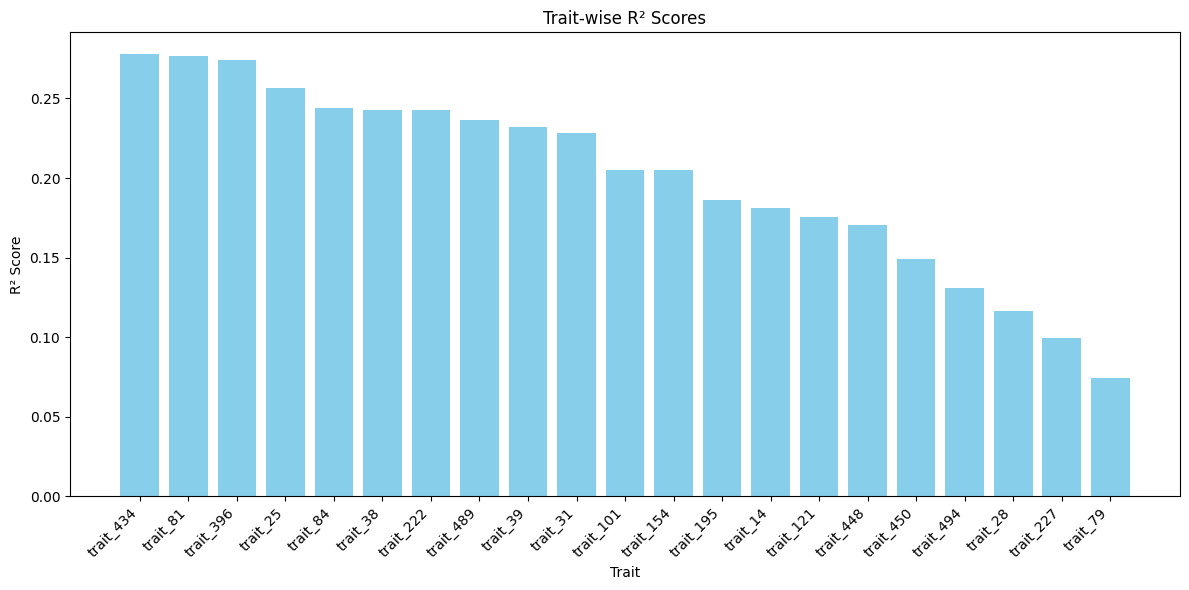

In [74]:
plot_r2_scores(filtered_result_deberta_2)

### ELECTRA

In [41]:
# Load the model_H
model_H = Autoencoder(input_dim=768, latent_dim=20, dropout=0.1)
model_H.load_state_dict(torch.load("../data/moral-classification/model_H_electra.pt", map_location=torch.device('cpu')))

avg_embedding_electra = {}

for movie_name, characters in electra_embeddings.items():
    avg_embedding_electra[movie_name] = {}
    for char_name, sentence_embeddings in characters.items():
        # Convert to tensor if not already
        tensor_embeddings = torch.tensor(sentence_embeddings)  # shape: [num_sentences, embedding_dim]
        mean_embedding = tensor_embeddings.mean(dim=0)  # shape: [embedding_dim]
        avg_embedding_electra[movie_name][char_name] = mean_embedding.tolist()

latent_embeddings_electra = {}

model_H.eval()  # Set model to evaluation mode

latent_embeddings_electra = {}

for movie_name, characters in avg_embedding_electra.items():
    latent_embeddings_electra[movie_name] = {}
    for char_name, avg_emb in characters.items():
        with torch.no_grad():
            input_tensor = torch.tensor(avg_emb).float().unsqueeze(0)  # shape: [1, 768]
            latent_vector = model_H.encoder(input_tensor)  # shape: [1, 20]
            latent_embeddings_electra[movie_name][char_name] = latent_vector.squeeze(0).tolist()  # shape: [20]

/var/folders/4p/8nlm0n094791rk0xf6jzk8ch0000gn/T/ipykernel_531/954939649.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_H.load_state_dict(torch.load("../data/mora

In [42]:
result_electra_1 = method_1(latent_embeddings_electra, moral_ratings)

In [43]:
result_electra_1

,trait_0,trait_1,trait_2,trait_3,trait_4,trait_5,trait_6,trait_7,trait_8,trait_9,...,trait_490,trait_491,trait_492,trait_493,trait_494,trait_495,trait_496,trait_497,trait_498,trait_499
latent_0,0.024908,0.192442,0.028398,0.037287,-0.107246,0.075954,0.106697,-0.098006,-0.024324,0.060252,...,0.063035,0.076238,-0.168903,-0.030446,-0.092454,-0.063340,-0.003698,-0.083855,0.023128,-0.011033
latent_1,-0.194833,-0.205152,-0.171796,-0.029066,0.184767,-0.121386,-0.007410,0.260330,0.167856,-0.173474,...,-0.081213,-0.076530,0.081722,-0.013231,0.093445,0.038904,0.018952,-0.035163,0.037207,0.088375
latent_2,0.165661,0.203560,0.149476,0.049301,-0.164232,0.101982,0.023388,-0.229076,-0.129554,0.165774,...,0.049413,0.073475,-0.084700,0.014943,-0.087547,-0.047674,-0.021267,0.003842,-0.025251,-0.082381
latent_3,0.254525,0.138725,0.232459,0.102901,-0.168685,0.164111,-0.107928,-0.323546,-0.287528,0.195478,...,0.064294,0.050805,-0.010566,0.043199,-0.096812,0.000316,0.003145,0.137433,-0.088419,-0.173615
latent_4,-0.249627,-0.030623,-0.255478,0.077469,0.105906,0.039257,0.262480,0.289493,0.255936,-0.280940,...,0.064993,-0.019694,-0.151845,-0.134645,-0.046599,0.027740,0.065142,-0.204494,-0.003693,0.171004
latent_5,0.147336,0.190490,0.123999,0.066223,-0.153768,0.129806,0.031522,-0.213371,-0.118657,0.119155,...,0.064578,0.069704,-0.099787,-0.020620,-0.113217,-0.038429,0.017146,0.011981,-0.040377,-0.074203
latent_6,-0.064280,-0.324130,-0.051944,0.105977,0.223158,0.009795,-0.116493,0.165743,0.037781,-0.177209,...,-0.108876,-0.110909,0.204089,0.018904,0.069131,0.137751,0.067302,0.102671,-0.067064,-0.030923
latent_7,-0.288644,-0.100097,-0.208190,-0.148108,0.191356,-0.270479,0.084692,0.305245,0.316725,-0.093189,...,-0.086323,-0.012336,-0.066017,0.038831,0.069867,-0.087059,-0.010359,-0.232686,0.177692,0.147345
latent_8,0.153089,0.185442,0.130813,0.099146,-0.138939,0.120174,0.033012,-0.222020,-0.151437,0.143683,...,0.039892,0.057200,-0.091941,-0.002223,-0.102517,-0.033044,0.008771,0.040039,-0.038469,-0.065254
latent_9,0.214701,0.195091,0.199787,0.023743,-0.187149,0.124394,0.016505,-0.267800,-0.151795,0.184337,...,0.065856,0.071240,-0.053402,0.018598,-0.078631,-0.026242,-0.041256,0.031745,-0.043521,-0.090362


In [44]:
result_electra_2 = method_2(latent_embeddings_electra, moral_ratings)

In [45]:
result_electra_2

,trait_index,r2_score,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16,latent_17,latent_18,latent_19
0,trait_0,0.269763,-943.732910,-153.809402,-710.321533,127.991440,-939.338257,-422.565979,1237.750488,-547.429138,...,-760.597595,1275.349365,158.885971,-254.783585,-201.269897,1171.751709,465.781097,71.189438,-75.001083,1303.177979
1,trait_1,0.256068,-1100.691040,723.411621,614.057739,261.364838,801.059937,-482.125092,-1411.369873,290.954651,...,-1299.682983,1275.565430,-150.102737,-267.330841,246.022736,-733.675232,-12.614028,347.729675,851.854858,489.441437
2,trait_2,0.286923,-1015.827332,-76.610062,332.479767,781.584595,-1074.242798,400.027527,1168.970215,-144.300659,...,348.818695,627.179504,1395.281494,-769.764771,-902.132935,828.453369,980.289673,123.369751,-339.372528,1292.283081
3,trait_3,0.305163,1177.629639,323.368530,184.009125,-1010.463318,352.214081,1039.510132,896.870972,784.709595,...,2844.652344,-3300.214600,48.106171,593.437378,-528.835876,-727.035461,1845.826782,102.159904,-783.654297,-3406.328613
4,trait_4,0.214558,-156.001572,472.748932,863.804871,310.375061,-974.396729,1109.599487,-71.212914,1399.624390,...,975.155396,-2131.717041,353.709076,225.370300,-586.503052,339.960297,-50.508549,-784.926453,-1010.154785,-558.362793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,trait_495,0.180095,766.779846,-792.745239,-1892.198730,-625.690491,599.384949,-974.720215,1409.139526,-1513.689697,...,368.546356,-206.130508,223.188263,6.080480,867.126587,1400.423462,-620.029602,-571.631531,160.616882,184.827591
496,trait_496,0.092049,-595.571716,-928.704346,-566.223755,-270.418060,593.383057,-24.997654,527.662842,-788.649902,...,350.577271,327.092133,439.777496,-747.397339,682.321411,1300.172485,-575.567505,137.001175,66.644585,329.440308
497,trait_497,0.299293,551.855347,-1158.028809,-1891.502686,-1168.201294,88.173874,-1053.587402,1749.254150,-1559.636841,...,336.744354,187.683304,-619.204529,-250.280380,1226.985840,891.389648,-7.637214,673.742920,453.505951,-164.142822
498,trait_498,0.195634,176.790741,323.544495,1528.884155,619.599976,-936.258789,1147.245728,-608.343506,1308.532837,...,655.403748,-246.776093,699.228333,-130.451294,-1562.419434,-1501.679932,1120.748901,280.950470,-498.979767,-500.742279


In [61]:
# Convert trait indices to column/row names
trait_cols = [f"trait_{i}" for i in trait_set]

# Filter result_bert_1 columns
filtered_result_electra_1 = result_electra_1[trait_cols]

# Filter result_bert_2 rows (since traits are in the 'trait_index' column)
filtered_result_electra_2 = result_electra_2[result_electra_2["trait_index"].isin(trait_cols)]

output_path = '../data/moral-classification/filtered_result_electra_1.csv'
filtered_result_electra_1.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

output_path = '../data/moral-classification/filtered_result_electra_2.csv'
filtered_result_electra_2.to_csv(output_path, index=True)
print(f"Filtered result saved to {output_path}")

Filtered result saved to ../data/moral-classification/filtered_result_electra_1.csv
Filtered result saved to ../data/moral-classification/filtered_result_electra_2.csv


In [70]:
get_strong_correlations(filtered_result_electra_1, threshold=0.3)

[('latent_3', 'trait_434', np.float64(-0.3150161227594803)),
 ('latent_4', 'trait_489', np.float64(-0.3217936090776652)),
 ('latent_18', 'trait_81', np.float64(0.3411553340456078))]

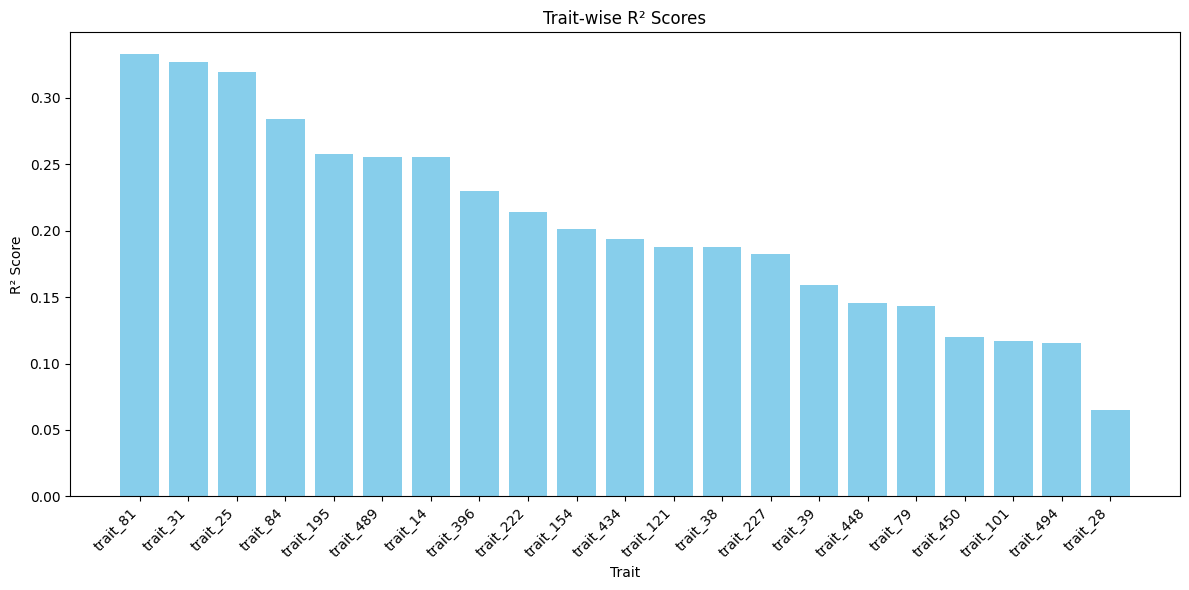

In [75]:
plot_r2_scores(filtered_result_electra_2)

In [22]:
# We will evaluate the performance of most_frequent classifier on both train and test data
# We will only check on Negative-class F1-score 

def compute_negative_f1(tn, fp, fn):
    # Avoid division by zero
    if tn + fn == 0 or tn + fp == 0:
        return 0.0  # or float('nan') to indicate it's undefined

    neg_precision = tn / (tn + fn)
    neg_recall = tn / (tn + fp)
    if neg_precision + neg_recall == 0:
        return 0.0  # or float('nan')

    neg_f1 = 2 * (neg_precision * neg_recall) / (neg_precision + neg_recall)
    return neg_f1, neg_recall, neg_precision

train_true_negative = 24666
train_false_negative = 5953
train_true_positive = 0
train_false_positive = 0

train_negative_f1, train_negative_recall, train_negative_precision = compute_negative_f1(train_true_negative, train_false_positive, train_false_negative)
print("Train Negative F1 Score:", train_negative_f1)
print("Train Negative Recall:", train_negative_recall)
print("Train Negative Precision:", train_negative_precision)

val_true_negative = 10126
val_false_negative = 3216
val_true_positive = 0
val_false_positive = 0

val_negative_f1, val_negative_recall, val_negative_precision = compute_negative_f1(val_true_negative, val_false_positive, val_false_negative)
print("Val Negative F1 Score:", val_negative_f1)
print("Val Negative Recall:", val_negative_recall)
print("Val Negative Precision:", val_negative_precision)

Train Negative F1 Score: 0.8923216062223026
Train Negative Recall: 1.0
Train Negative Precision: 0.805578235735981
Val Negative F1 Score: 0.8629623316856997
Val Negative Recall: 1.0
Val Negative Precision: 0.7589566781591965


## Trainable Base

### BERT

In [33]:
# Load the model_H
model_H = Autoencoder(input_dim=768, latent_dim=20, dropout=0.1)
model_H.load_state_dict(torch.load("../data/moral-classification/summer-report-5/trainable-base/bert/model_H_2.pt", map_location=torch.device('cpu')))

avg_embedding_bert = {}

for movie_name, characters in bert_embeddings.items():
    avg_embedding_bert[movie_name] = {}
    for char_name, sentence_embeddings in characters.items():
        # Convert to tensor if not already
        tensor_embeddings = torch.tensor(sentence_embeddings)  # shape: [num_sentences, embedding_dim]
        mean_embedding = tensor_embeddings.mean(dim=0)  # shape: [embedding_dim]
        avg_embedding_bert[movie_name][char_name] = mean_embedding.tolist()

model_H.eval()  # Set model to evaluation mode

latent_embeddings_bert = {}

for movie_name, characters in avg_embedding_bert.items():
    latent_embeddings_bert[movie_name] = {}
    for char_name, avg_emb in characters.items():
        with torch.no_grad():
            input_tensor = torch.tensor(avg_emb).float().unsqueeze(0)  # shape: [1, 768]
            latent_vector = model_H.encoder(input_tensor)  # shape: [1, 20]
            latent_embeddings_bert[movie_name][char_name] = latent_vector.squeeze(0).tolist()  # shape: [20]

/var/folders/4p/8nlm0n094791rk0xf6jzk8ch0000gn/T/ipykernel_15231/2643162873.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_H.load_state_dict(torch.load("../data/m

In [47]:
result_bert_1 = method_1(latent_embeddings_bert, moral_ratings)

In [48]:
result_bert_2 = method_2(latent_embeddings_bert, moral_ratings)

In [55]:
# Convert trait indices to column/row names
trait_cols = [f"trait_{i}" for i in trait_set]

# Filter result_bert_1 columns
filtered_result_bert_1 = result_bert_1[trait_cols]

# Filter result_bert_2 rows (since traits are in the 'trait_index' column)
filtered_result_bert_2 = result_bert_2[result_bert_2["trait_index"].isin(trait_cols)]
filtered_result_bert_1



,trait_14,trait_25,trait_28,trait_31,trait_38,trait_39,trait_79,trait_81,trait_84,trait_101,...,trait_154,trait_195,trait_222,trait_227,trait_396,trait_434,trait_448,trait_450,trait_489,trait_494
latent_0,-0.033152,-0.202470,0.010158,-0.226112,0.038660,-0.152712,0.100967,0.429147,-0.290798,0.217505,...,0.277585,-0.108735,0.121513,0.117376,0.182166,-0.241916,-0.276056,0.172931,-0.005614,-0.103873
latent_1,-0.054068,0.020061,0.043102,-0.001169,-0.124494,0.173532,-0.111489,-0.059261,0.024119,-0.078882,...,-0.126937,0.036385,-0.037233,0.054333,0.011286,-0.061073,0.192223,-0.225902,0.093052,0.084603
latent_2,-0.121706,-0.084444,0.109477,-0.128160,-0.241757,0.060907,-0.092432,0.035755,-0.122936,-0.012498,...,-0.094633,0.131955,0.031591,0.177683,0.067593,-0.223882,0.059055,-0.223208,0.062838,0.075839
latent_3,-0.012250,0.026355,0.052221,-0.079147,-0.163749,0.024562,-0.076819,0.123009,-0.026123,0.041486,...,0.007820,0.059231,0.021902,0.039862,0.006859,-0.157437,-0.071339,-0.078371,-0.088450,-0.035980
latent_4,-0.054780,-0.127404,-0.071699,-0.033075,0.240254,-0.134683,0.109399,0.036597,-0.007777,0.042903,...,0.100864,-0.172932,0.075982,-0.042957,0.067516,0.082469,-0.082008,0.173765,0.093793,-0.039050
latent_5,-0.061363,-0.101003,0.086850,-0.114381,-0.223747,0.161851,-0.027139,0.157387,-0.212190,0.047047,...,-0.000227,0.157522,-0.002071,0.169981,0.099190,-0.210114,0.010217,-0.131452,0.013474,0.037192
latent_6,0.044395,0.112774,-0.121569,0.181381,0.084735,0.057809,0.012801,-0.193997,0.259175,-0.031849,...,-0.087167,-0.067688,-0.173494,-0.190333,-0.159379,0.279084,0.070884,0.046559,0.013035,-0.023166
latent_7,-0.234739,-0.121702,0.025350,-0.139073,-0.009807,-0.049938,0.018417,-0.216593,0.082688,-0.130825,...,-0.212124,-0.011720,0.071550,0.031372,0.077883,-0.032643,0.194741,-0.201889,0.229070,0.061332
latent_8,-0.000792,-0.080155,0.030588,0.017979,0.145399,0.202266,0.024576,0.225294,-0.159263,0.046921,...,0.109582,-0.185047,0.083557,0.136383,0.165793,-0.142089,-0.012447,0.044075,0.142679,0.062337
latent_9,-0.040340,0.057524,0.108187,-0.043632,-0.192716,-0.016229,-0.076734,-0.064812,-0.008807,-0.078352,...,-0.137503,0.156525,-0.023866,0.088697,-0.043897,-0.131321,0.039831,-0.144093,-0.055103,0.015410


In [38]:
def get_strong_correlations(corr_df, threshold=0.4):
    """
    Returns a list of (latent, trait, correlation) tuples where
    |correlation| > threshold from the method_1 result.

    Parameters:
        corr_df (pd.DataFrame): Output from method_1
        threshold (float): Threshold for absolute correlation

    Returns:
        List[Tuple[str, str, float]]
    """
    strong_pairs = []

    for latent in corr_df.index:
        for trait in corr_df.columns:
            corr = corr_df.at[latent, trait]
            if pd.notna(corr) and abs(corr) > threshold:
                strong_pairs.append((latent, trait, corr))

    return strong_pairs

get_strong_correlations(filtered_result_bert_1, threshold=0.3)


[('latent_0', 'trait_81', np.float64(0.4291466535857457)),
 ('latent_16', 'trait_81', np.float64(-0.3093749850143121)),
 ('latent_16', 'trait_84', np.float64(0.3150975224582172))]

In [52]:
trait_dict

{14: 'cunning-honorable',
 25: 'forgiving-vengeful',
 28: 'loyal-traitorous',
 31: 'rude-respectful',
 38: 'arrogant-humble',
 39: 'heroic-villainous',
 79: 'selfish-altruistic',
 81: 'angelic-demonic',
 84: 'cruel-kind',
 101: 'biased-impartial',
 121: 'sarcastic-genuine',
 154: 'judgemental-accepting',
 195: 'complimentary-insulting',
 222: 'wholesome-salacious',
 227: 'racist-egalitarian',
 396: 'innocent-jaded',
 434: 'resentful-euphoric',
 448: 'fake-real',
 450: 'catty-supportive',
 489: 'sincere-irreverent',
 494: 'hopeful-fearful'}

In [46]:
import matplotlib.pyplot as plt

def plot_r2_scores(result_df, trait_dict, top_n=None, figsize=(12, 6), title="Trait-wise R² Scores"):
    """
    Plots a bar chart of R² scores from the result of method_2 with trait names.

    Parameters:
        result_df (pd.DataFrame): Output of method_2
        trait_dict (dict): Mapping from trait index to trait name (e.g., {14: "cunning-honorable"})
        top_n (int, optional): Plot only the top N traits by R². If None, plot all.
        figsize (tuple): Figure size
        title (str): Title of the plot
    """
    # Drop NaN values and sort by R² score
    df = result_df.dropna(subset=["r2_score"]).sort_values("r2_score", ascending=False)

    if top_n:
        df = df.head(top_n)

    # Extract index from 'trait_<index>' and map to trait name
    df["trait_label"] = df["trait_index"].apply(
        lambda x: trait_dict.get(int(x.replace("trait_", "")), x)
    )

    plt.figure(figsize=figsize)
    plt.bar(df["trait_label"], df["r2_score"], color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Trait")
    plt.ylabel("R² Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

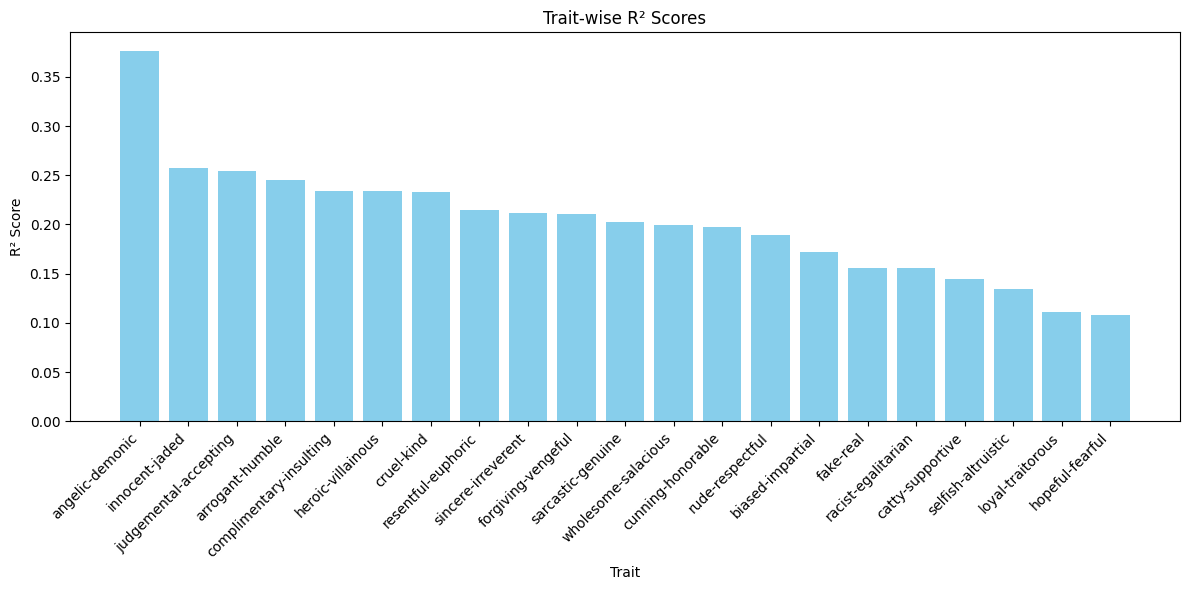

In [56]:
plot_r2_scores(filtered_result_bert_2, trait_dict)

In [2]:
import json

# Let's save the data to a JSON file
output_file_path = '../data/dump/project_6_data.json'
with open(output_file_path, 'r') as f:
    data_for_project_6 = json.load(f)

In [4]:
len(data_for_project_6["sentences"]["Superbad"]["SETH"])

296